Stochastic Calculus <br>
Brownian motion, marginales <br>
Ito's calculus

In [27]:
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt

In [28]:
# Simulate a brownian path using numpy. 
# Create a numpy array and append each random up or down step 
def brownian_path(end_time, time_step):
    total_len = int(end_time/time_step) +1
    BP = [0]*total_len
    
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i] = np.random.normal(0,std,1)
    
    # Make a NumPy array containing both strings and floats, 
    # by using the dtype object, which enables the array to hold arbitrary Python objects:
    BP = np.array(BP,dtype = object).cumsum()
    time_line = np.array([time_step*i for i in range(total_len)])
    
    return (time_line, BP) 

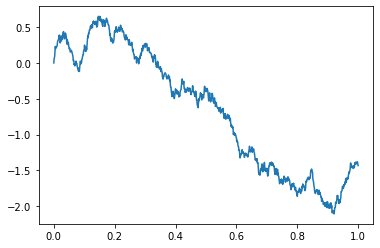

In [29]:
# Plot a single Brownian path with time step 0.001 with an end time of 1
seed = 0
np.random.seed(seed)
[time,BP]=brownian_path(1,0.001)
plt.plot(time,BP)
plt.show()

In [30]:
# Plot brownian bridge
# The whole point of brownian bridge is to create multiple brownian paths that 
# converge to where it orginally started
def brownian_bridge(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        B_1 = BP[-1]
        M_t = [BP[i] - t * B_1 for i,t in enumerate(time_line)]
        plt.plot(time_line, M_t)
    plt.show()

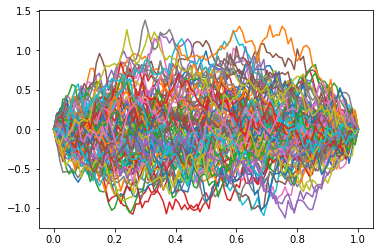

In [31]:
# Plot 100 paths
brownian_bridge(1,0.01,100)

In [32]:
# Simulate martingales using updated Brownian paths
# Suppose Martingale is a stock price chart
# By definition, martingale is a conditional expectation of the 
# price tomorrow given the filtration is the price today
def martingale(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        new_BP = np.square(BP)
        updated_BP = [new_BP[i] - t for i,t in enumerate(time_line)]
        updated_BP = np.array(updated_BP,dtype = object)
        plt.plot(time_line, updated_BP)
    plt.show()

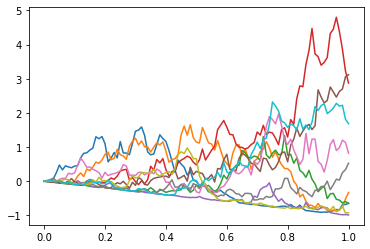

In [33]:
seed = 0
paths = 10
np.random.seed(seed)
martingale(1,0.01,paths)

In [34]:
# Geometric Brownian Motion is used to model stock price behavior, 
# which furthermore can be implemented in Options Modeling
# Geometric Brownian Motion becomes a martingale with a specific drift - that is why it is so good for modeling stock prices
def geometric_brownian_motion(end_time, time_step, n):
    for j in range(n):
        time_line, BP = brownian_path(end_time, time_step)
        new_BP = [BP[i] - (t/2) for i,t in enumerate(time_line)]
        S_t = np.array([np.exp(i) for i in new_BP], dtype = object)
        plt.plot(time_line, S_t)
    plt.show()

In [35]:
# Define new brownin path function
def brownian_path(end_time, time_step, B0):
    
    total_len = int(end_time/time_step) +1
    BP = [B0]*total_len
    
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i] = np.random.normal(0,std,1)
    
    BP = np.array(BP, dtype = 'float').cumsum()
    
    return BP 

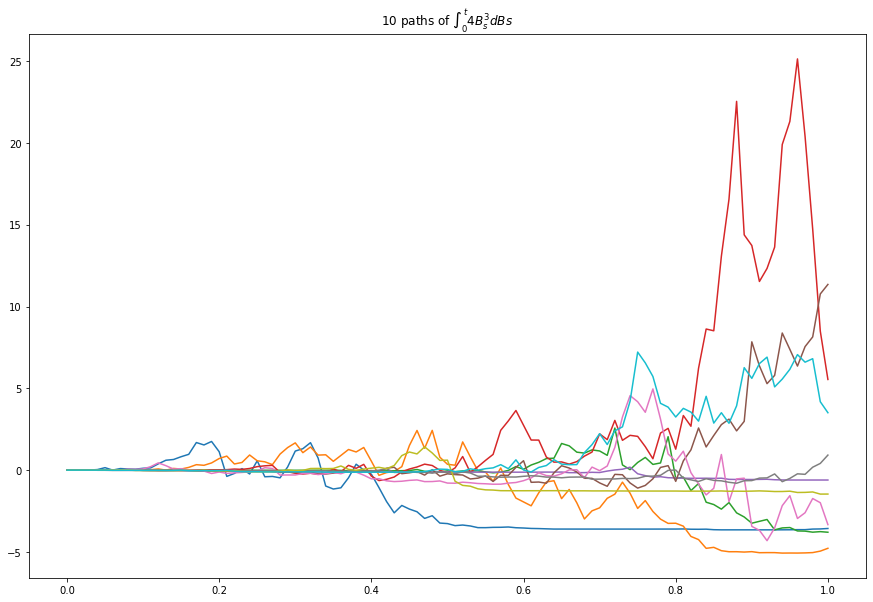

In [36]:
# Here is an example of an Ito Integral
np.random.seed(0)
plt.figure(figsize = (15,10))
plt.title('10 paths of $\int_{0}^{t} 4B^3_s dBs$')

end_time = 1
time_step=0.01
start = 0
total_len = int(end_time/time_step) +1
N = 10
t = np.linspace(0,end_time,total_len)
path = []
I0 = 0
for i in range(N):
    path.append(brownian_path(end_time, time_step, start))
    I = [I0] * total_len
    ito_a = 0
   
    for j in range(len(path[i])-1): 
        ito_a += 4 * np.power((path[i][j]),3) * (path[i][j+1]-path[i][j]) 
        I[j+1] = np.array(ito_a, dtype = object)
    plt.plot(t, I)
plt.show()

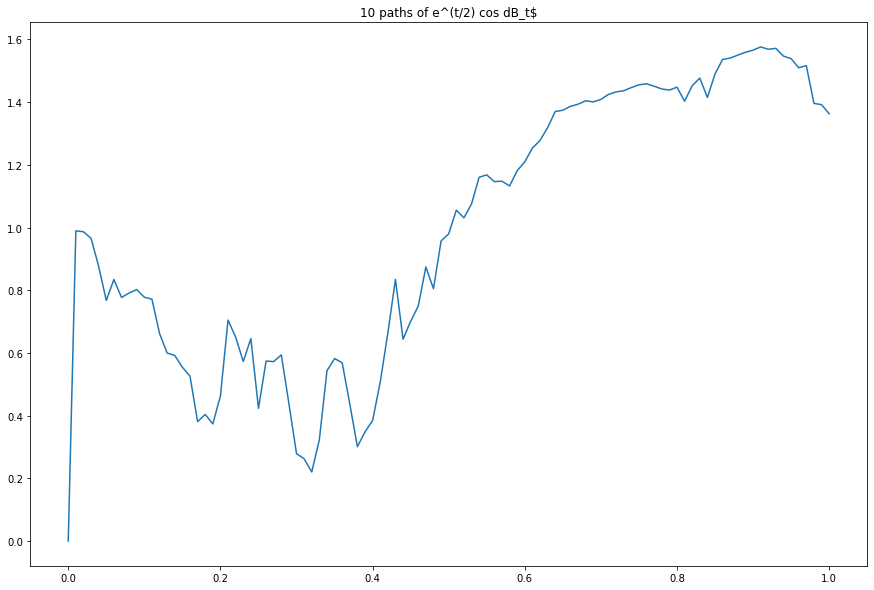

In [37]:
#Now I will plot an equation that satisfies Ito's Formula
np.random.seed(0)
plt.figure(figsize = (15,10))
plt.title('10 paths of e^(t/2) cos dB_t$')

end_time = 1
time_step=0.01
start = 0
total_len = int(end_time/time_step) +1
N = 1
t = np.linspace(0,end_time,total_len)
path = []
J0 = 0
for i in range(N):
    path.append(brownian_path(end_time, time_step, start))
    J = [J0] * total_len
    ito_c = 0
   
    for j in range(len(path[i])-1): 
        J[j+1] =  math.exp(0.5 * t[j+1]) * math.cos(path[i][j+1])
    plt.plot(t, J)
    
plt.show()

In [38]:
# Simulated various Stochastic Differential Equations, which come from Ito's formula
# Stochastic Differential Equations result in a solution that is also a stochastic process. 
# For these examples, I used the Euler - Maruyama method to simulate the diffusions 
# given by their SDE's 
# The Euler - Maruyama method is a method for the approximate numerical 
# solution of an Stochastic Differential Equation. 

Npath = 100
dt = 0.01
Nt = int(1 / dt)
t = np.linspace(0,1,Nt+1)
epsilon = np.random.randn(Npath, Nt) * math.sqrt(dt)#is the brownian increment

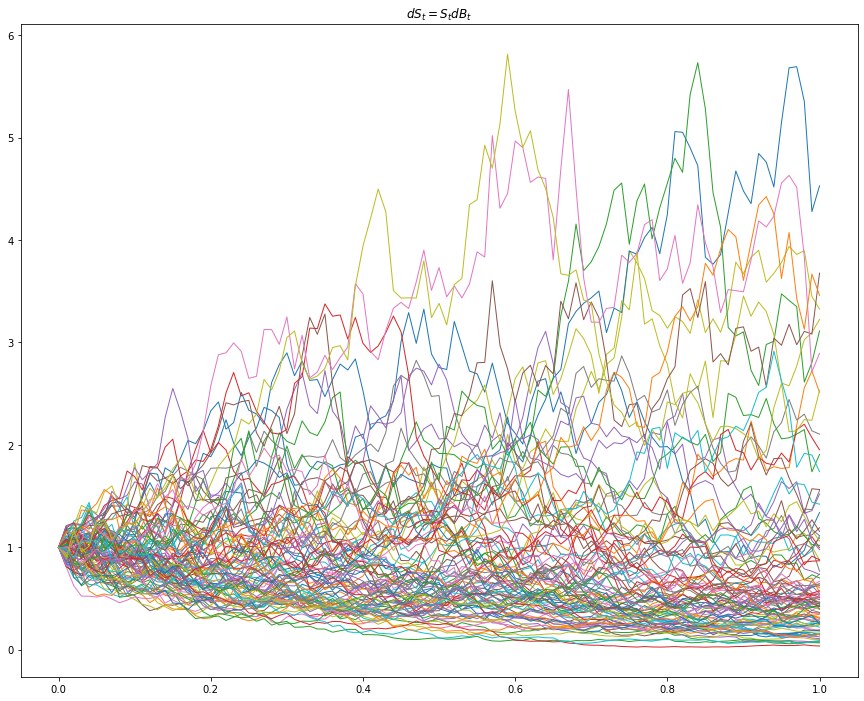

In [39]:
# Euler Geometric Brownian Motion
# dSt = StdBt, S0 = 1.
np.random.seed(seed)
S_euler = np.ones((Npath, Nt+1))
plt.figure(figsize=(15,12))

for ipath in range(0,Npath):
    for it in range(0,Nt):
        S_euler[ipath,it+1] = S_euler[ipath,it] + S_euler[ipath,it] * epsilon[ipath,it]
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.title("$dS_t = S_tdB_t$")
plt.show()

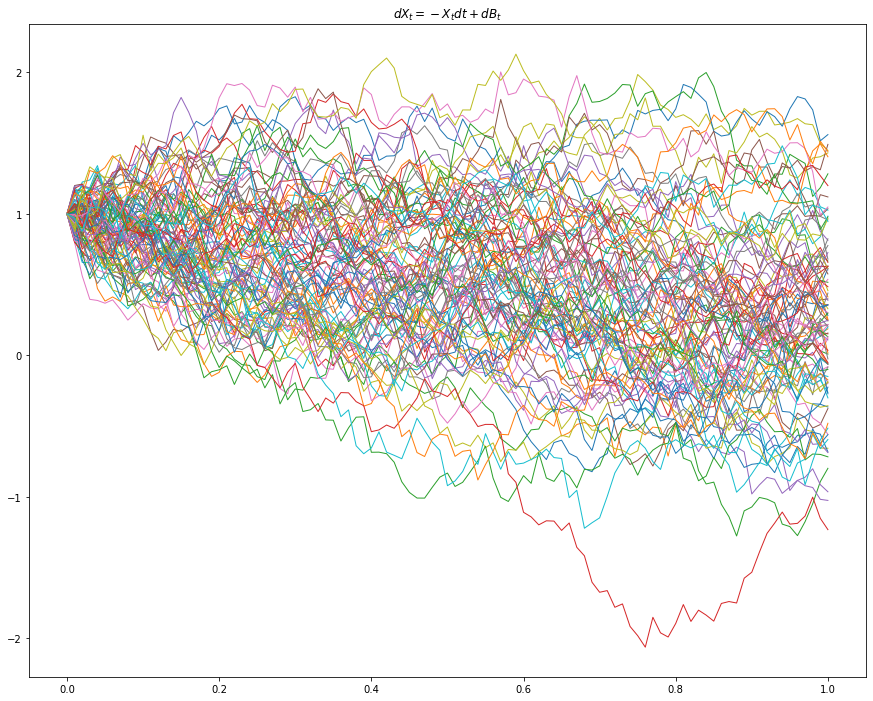

In [40]:
# Ornstein-Uhlenbeck Process:
# dX_t=-X_t*dt+dB_t, X_0=1
np.random.seed(seed)
S_euler = np.ones((Npath, Nt+1))
plt.figure(figsize=(15,12))

for ipath in range(0,Npath):
    for it in range(0,Nt):
        S_euler[ipath,it+1] = S_euler[ipath,it] -S_euler[ipath,it] *dt+ epsilon[ipath,it]

    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.title("$dX_t = -X_tdt + dB_t$")
plt.show()

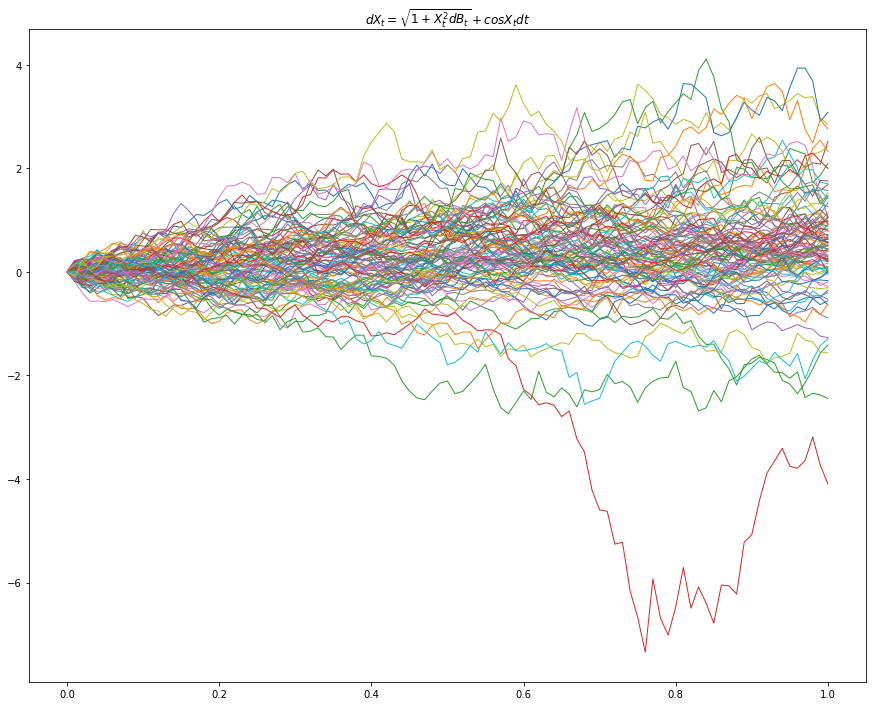

In [41]:
# A diffusion is a continuous time Markov Process with continuous sample paths. 
# Brownian motion is a diffusion proces.
# A diffusion is a process that satisifes a stochastic differential equation
# A MC is a model that describes a sequence of possible events in which the 
# probability of each event depends only on the state attained in the previous event. 

#The diffusion
#dX_t=sqrt(1+X_t^2)*dB_t+cosX_t dt, X_0=0
np.random.seed(seed)
S_euler = np.zeros((Npath, Nt+1))

plt.figure(figsize=(15,12))

for ipath in range(0,Npath):
    for it in range(0,Nt):
        e = epsilon[ipath,it]
        S_euler[ipath,it+1] = S_euler[ipath,it]+ math.cos(S_euler[ipath,it])*dt + math.sqrt(1+(S_euler[ipath,it])**2)*e 
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.title("$dX_t =\sqrt{1 + X_t^2dB_t} + cosX_tdt$")
plt.show()

In [42]:
# BSM Calculator 
# It inputs the parameters T, K, S_t, t, r, sigma
import scipy.stats as si

In [43]:
def europeanCall(S, K, T, t, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = (np.log(S / K) + (r - 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))

    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * (T-t)) * si.norm.cdf(d2, 0.0, 1.0))

    return call

In [44]:
def europeanPut(S, K, T, t, r, sigma):

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))
    
    put = (X * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

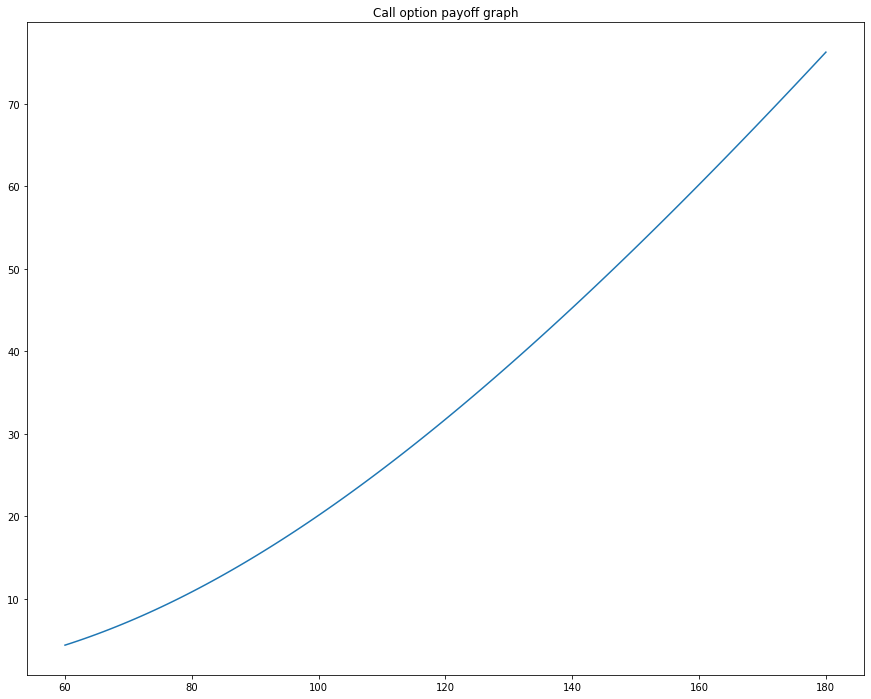

In [45]:
# Value american call option
r = 0
sigma = 0.6765
T = 1
X = 120
t = 0

S = np.linspace(60,180,120)
call = europeanCall(S, X, T, t, r, sigma)
plt.figure(figsize=(15,12))
plt.title("Call option payoff graph")
plt.plot(S, call)

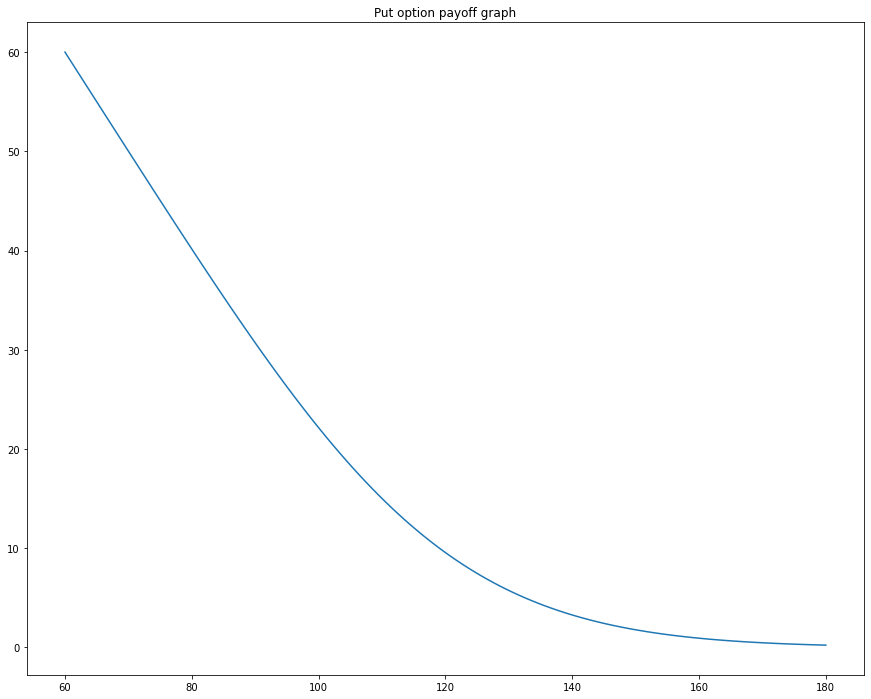

In [46]:
# Value american put option
r = 0
sigma = 0.2
T = 1
X = 120
t = 0

S = np.linspace(60,180,120)
put = europeanPut(S, X, T, t, r, sigma)
plt.figure(figsize=(15,12))
plt.title("Put option payoff graph")
plt.plot(S, put)

In [47]:
# We start with a brownian path 
def brownian_path(end_time, time_step):
    total_len = int(end_time/time_step) +1
    BP = [0]*total_len
    
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i] = np.random.normal(0,std,1)
        
    BP = np.array(BP,dtype = object).cumsum()
    time_line = np.array([time_step*i for i in range(total_len)])
    
    return (time_line, BP)

In [48]:
# Simulate random paths and since it is a call option 
# If the random price is above the strike price, that is your payoff
def monteCarloPrice(S,K,T,t,r,sigma, N, time_step):
    discount = np.exp(-r *(T-t))
    call = []
    path = []
    std = np.sqrt(time_step)
    for i in range(N):
        [time, BP] = brownian_path((T-t), time_step)
        path = [0] * len(BP)
        for j in range(len(BP)):
            path[j] = S * np.exp(sigma * BP[j] + (r-(sigma**2)/2) * time[j])
        call.append(max(0, path[-1] - K))
    return np.mean(call) * discount

In [49]:
# Calculate options using Monte-Carlo
# Warning! This is slow!
S = 500
K = 480
T = 1
t = 0
r = 0.05 
sigma = 0.1 
N = 1000
time_step = 0.001
paths = [10, 100, 1000, 10000]

for i in paths:
    print("Monte-Carlo price with", i,"paths: ", 
          monteCarloPrice(S, K, T, t, r, sigma, i, time_step))


C:\Users\kimvl\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Monte-Carlo price with 10 paths:  [24.33585821]
Monte-Carlo price with 100 paths:  [52.37556074]
Monte-Carlo price with 1000 paths:  [48.88420233]
Monte-Carlo price with 10000 paths:  [48.49324898]


$\textbf{Sampling bias a la Cameron-Martin}.$ <br> Consider a Brownian motion with drift $\theta = 1$: $\tilde{B_t} = B_t + t$.

In [50]:
# Brownian motion fucntion
def brownian_path(end_time, time_step):
    total_len = int(end_time/time_step)+1
    BP = [0]*total_len
    
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i]=np.random.normal(0,std,1)
    
    BP = np.array(BP, dtype=float).cumsum()
    time_line = np.array([time_step*i for i in range(total_len)])
    
    return (time_line, BP)

# Brownian motion with drift
def brownian_drift(end_time, time_step, mean, volatility):
    total_len = int(end_time/time_step)+1
    
    time_line, BP = brownian_path(end_time, time_step)
    BP_drift = [(BP[i]*volatility) + (mean*t) for i, t in enumerate(time_line)]
        
    return(time_line, BP_drift)

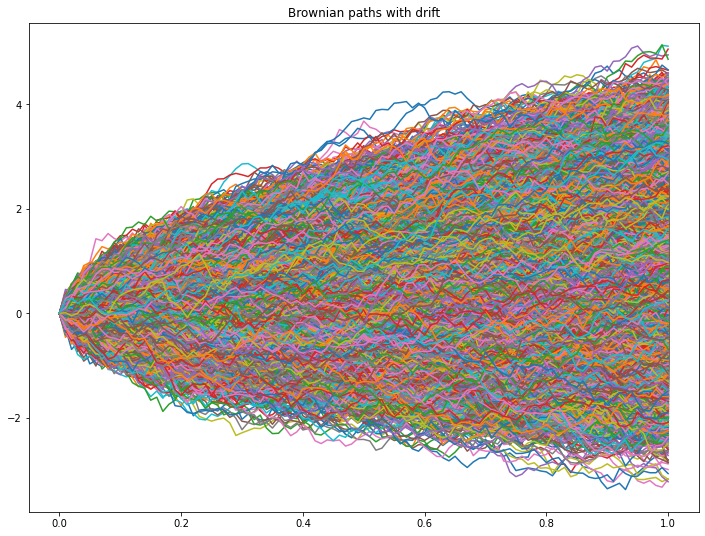

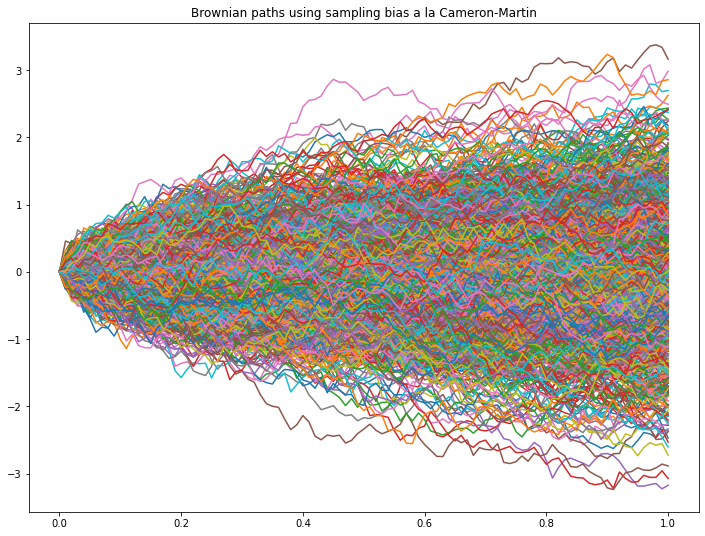

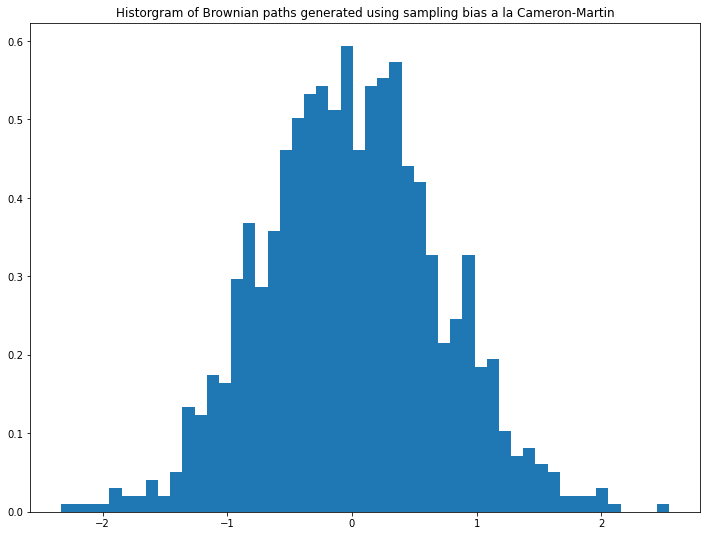

509.264213107205


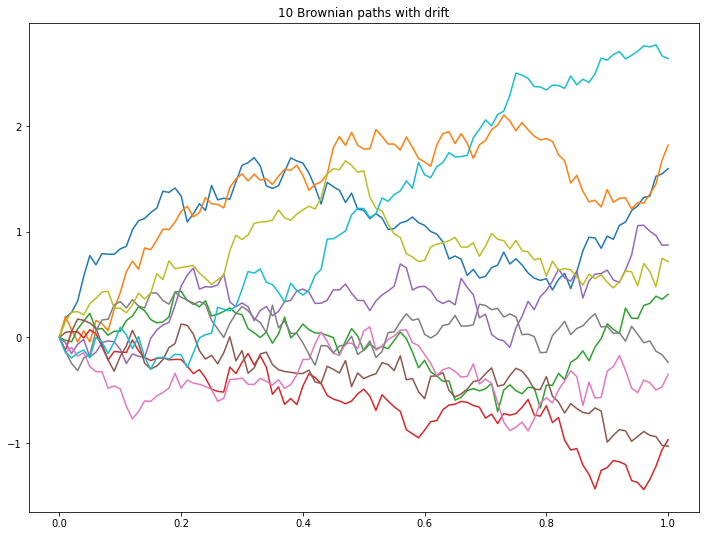

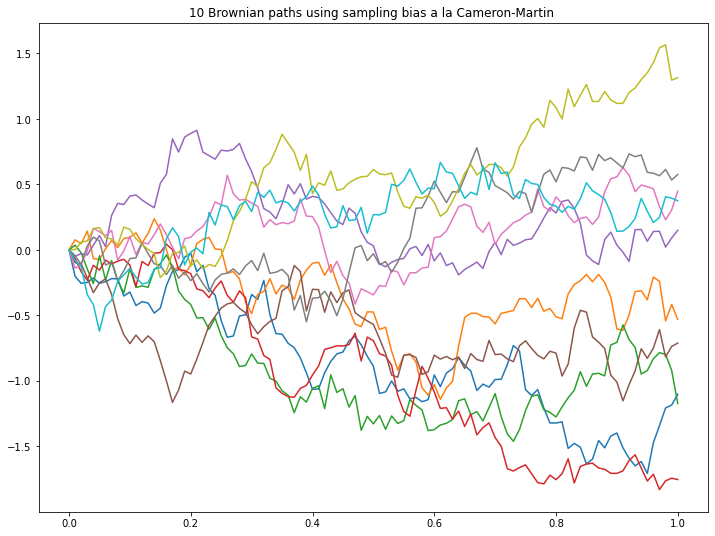

In [51]:
#1 (a)
seed = 0 
np.random.seed(seed)
vol = 1
mean = 1 # Upwards drift of 1
paths = 100000 # 100,000 paths (takes a long time)
time_step = 0.01 # Discretization


prob = [0] * paths # Initialize array prob for our biased sampling
# Create this path_matrix for, when need to sample 100000 of these paths
path_matrix = []
plt.figure(figsize=(12,9))
plt.title("Brownian paths with drift")
for i in range(paths):
    [time, BP_drift]=brownian_drift(1,time_step,mean,vol)
    path_matrix.append([time, BP_drift])
    # Populate our biased weights for each path
    prob[i]=np.exp(-BP_drift[-1]+(0.5))
    plt.plot(time, BP_drift)
plt.show()

# Create our weight vector called prob 
# prob will be of length paths
# bias is calculated: e^(BP_drift(1)+(1/2))

# Issue is I need to change this so that sum of vector of probabilities equals 1

# Make biased matirix sum to one 
tot = sum(prob)
sum_to_one=prob/tot

# Set replace=False so that paths cannot be picked twice
# x will be array of 1000 numbers, 0 to paths-1, that will represent the paths chosen to sample 
x = np.random.choice(paths, 1000, replace=False, p=sum_to_one)

# print("These are the paths we must plot")
# print(x)

# Plot only our 1000 biased paths
# data array will be used to gather B_tilde(1/2)
data = []
# print(path_matrix[0])
plt.figure(figsize=(12,9))
plt.title("Brownian paths using sampling bias a la Cameron-Martin")
for element in x:
    plt.plot(path_matrix[element][0], path_matrix[element][1])
    data.append(path_matrix[element][1][50])
plt.show()

# Draw the histogram of B_tilde(1/2) from sample of size of 1000 from above

plt.figure(figsize=(12,9))
plt.title("Historgram of Brownian paths generated using sampling bias a la Cameron-Martin")
plt.hist(data,density=True, bins=50) 
plt.show()
mean = np.mean(data)
#print(np.sum([(mean-i)**2 for i in data]))

# Plot first 10 paths from S and first 10 Paths from S_tilde
plt.figure(figsize=(12,9))
plt.title("10 Brownian paths with drift")
for i in range(10):
    plt.plot(path_matrix[i][0], path_matrix[i][1])   
plt.show()

plt.figure(figsize=(12,9))
plt.title("10 Brownian paths using sampling bias a la Cameron-Martin ")
for i in range(10):
    plt.plot(path_matrix[x[i]][0], path_matrix[x[i]][1])
plt.show()

# TLDR 
# Naive numerical implementations suffer from issues related to statistical bias 
# and sampling efficiency. Here is a  method to discretize the stochastic process 
# that reduce the bias of the numerical scheme

$\textbf{The CIR model}.$ <br> Consider the CIR process given by the SDE $\text{d}Z_t = (a - Z_t)\text{d}t + \sqrt(Z_t)\text{d}B_t, \;Z_0 = 1.$

In [52]:
Npath = 10
dt = 0.001
Nt = int(1 / dt)
t = np.linspace(0,1,Nt+1)
epsilon = np.random.randn(Npath, Nt) * math.sqrt(dt)#is the brownian increment

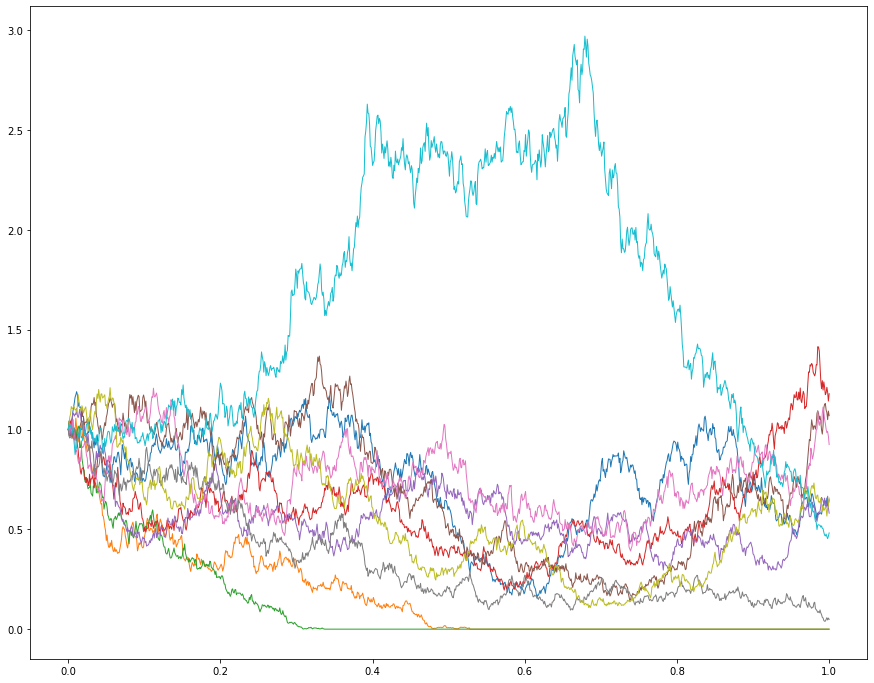

In [53]:
#3 (a) a = 0.1
np.random.seed(seed)
S_euler = np.zeros((Npath, Nt+1))
plt.figure(figsize=(15,12))

a = 0.1
for ipath in range(0,Npath):
    S_euler[ipath, 0] = 1 #set the first condition
    for it in range(0,Nt):
        e = epsilon[ipath,it]
        S_euler[ipath,it+1] = S_euler[ipath,it]+ math.sqrt(S_euler[ipath,it])*e + (a - S_euler[ipath,it])*dt
        if(S_euler[ipath,it+1] < 0):
            for cont in range(it,Nt):
                S_euler[ipath,cont] = 0;
            break
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.show()


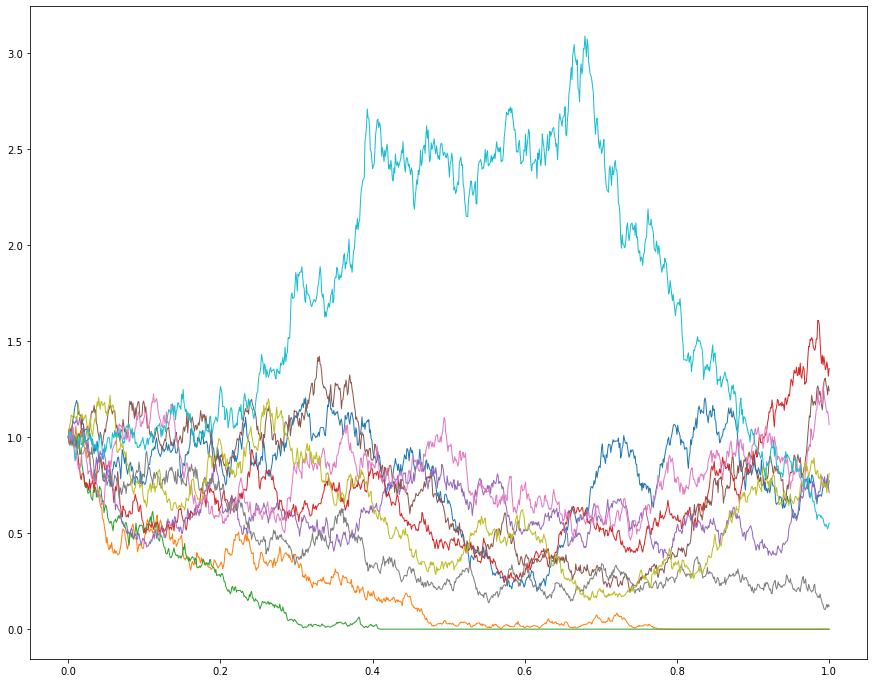

In [54]:
#3 (a) a = 0.25
np.random.seed(seed)
S_euler = np.zeros((Npath, Nt+1))
plt.figure(figsize=(15,12))
a = 0.25
for ipath in range(0,Npath):
    S_euler[ipath, 0] = 1 #set the first condition
    for it in range(0,Nt):
        e = epsilon[ipath,it]
        S_euler[ipath,it+1] = S_euler[ipath,it]+ math.sqrt(S_euler[ipath,it])*e + (a - S_euler[ipath,it])*dt
        if(S_euler[ipath,it+1] < 0):
            for cont in range(it,Nt):
                S_euler[ipath,it+1] = 0;
            break
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.show()

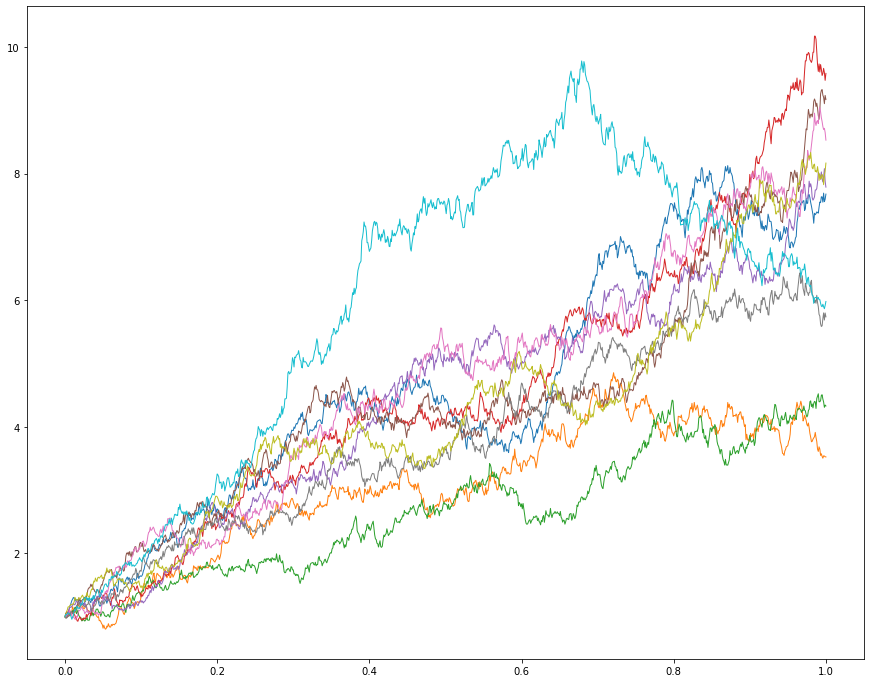

In [55]:
#3 (a) a = 10
np.random.seed(seed)
S_euler = np.zeros((Npath, Nt+1))
plt.figure(figsize=(15,12))
a = 10
for ipath in range(0,Npath):
    S_euler[ipath, 0] = 1 #set the first condition
    for it in range(0,Nt):
        e = epsilon[ipath,it]
        S_euler[ipath,it+1] = S_euler[ipath,it]+ math.sqrt(S_euler[ipath,it])*e + (a - S_euler[ipath,it])*dt
        if(S_euler[ipath,it+1] < 0):
            for cont in range(it,Nt):
                S_euler[ipath,it+1] = 0;
            break
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.show()

In [56]:
#3 (b) 
a_values = [0.1, 0.25, 10]
Npath = 1000
S_euler = np.zeros((Npath, Nt+1))
epsilon = np.random.randn(Npath, Nt) * math.sqrt(dt)#is the brownian increment

negative_paths = 0

for a in a_values:
    negative_paths = 0
    for ipath in range(0,Npath):
        S_euler[ipath, 0] = 1
        for it in range(0,Nt):
            e = epsilon[ipath,it]
            S_euler[ipath,it+1] = S_euler[ipath,it]+ math.sqrt(S_euler[ipath,it])*e + (a - S_euler[ipath,it])*dt
            
            if(S_euler[ipath,it+1] < 0):
                for cont in range(it,Nt):
                    S_euler[ipath,it+1] = 0
                negative_paths += 1
                break
    print('The proportion of paths that became negative for', a, 'is', negative_paths/Npath)

The proportion of paths that became negative for 0.1 is 0.224
The proportion of paths that became negative for 0.25 is 0.12
The proportion of paths that became negative for 10 is 0.0


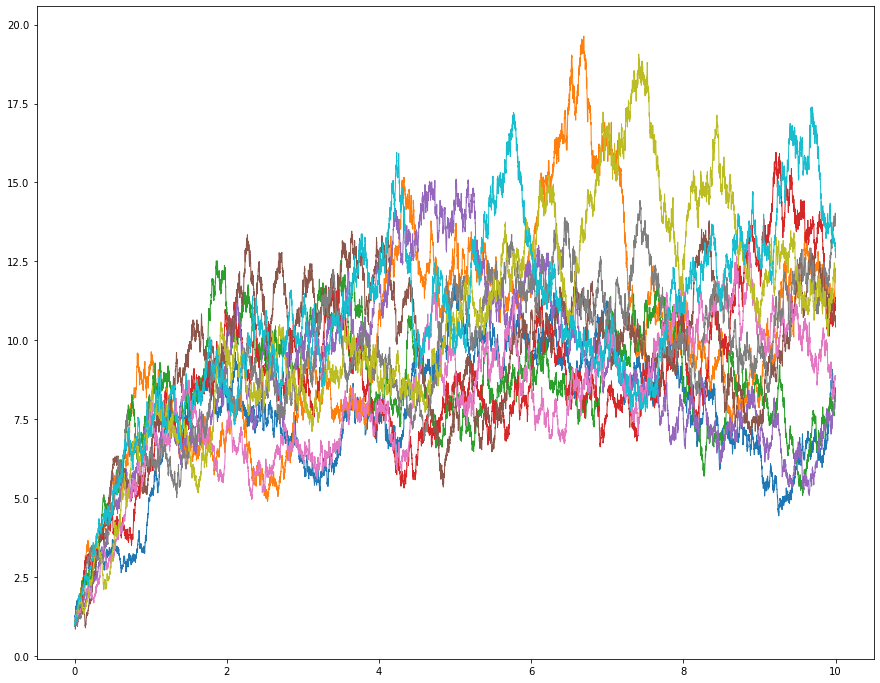

In [57]:
#3 (c) 
np.random.seed(seed)
a = 10
Npath = 10
dt = 0.001
Nt = int(10 / dt)
t = np.linspace(0,10,Nt+1)
epsilon = np.random.randn(Npath, Nt) * math.sqrt(dt)#is the brownian increment
S_euler = np.zeros((Npath, Nt+1))
plt.figure(figsize=(15,12))

for ipath in range(0,Npath):
    S_euler[ipath, 0] = 1 #set the first condition
    for it in range(0,Nt):
        e = epsilon[ipath,it]
        S_euler[ipath,it+1] = S_euler[ipath,it]+ math.sqrt(S_euler[ipath,it])*e + (a - S_euler[ipath,it])*dt
        if(S_euler[ipath,it+1] < 0):
            for cont in range(it,Nt):
                S_euler[ipath,it+1] = 0;
            break
    plt.plot(t,S_euler[ipath,:],linewidth=1)
plt.show()
# I noticed that this process on interval between [0,10] looks similar to
# the same process on interval between [0,1].
# This graph look more rigged due to the small size step and the big interval.
# It is also evident that the mean returns to 10 by the end of the process